In [14]:
## Matrizes de rotaçao
import math
import numpy as np
o1 = 0
o2 = 0
o3 = 0
o4 = 0
L1 = 14.5/100
L2 = 18.2/100
L3 = 9.0/100
h = 7.5/100

t1 = np.array([[np.cos(o1), -np.sin(o1), 0, 0],
      [np.sin(o1),np.cos(o1), 0, 0],
      [0,0, 1, h],
      [0, 0, 0, 1]])

t2 = np.array([[np.cos(o2), -np.sin(o2), 0, 0],
      [0, 0, -1, 0],
      [np.sin(o2),np.cos(o2), 0, 0],
      [0, 0, 0, 1]])

t3 = np.array([[np.cos(o3), -np.sin(o3), 0, L1],
      [np.sin(o3),np.cos(o3), 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]])
t4 = np.array([[np.cos(o4), -np.sin(o4), 0, L2],
        [np.sin(o4),np.cos(o4), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])
t5 = np.array([[1, 0, 0, L3],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]])

In [15]:
servo_0_0 = 1530
servo_1_0 = 700
servo_2_0 = 640
servo_3_0 = 1505

servo_0_90 = 640
servo_1_90 = 1460
servo_2_270 = 1455
servo_3_270 = 725

In [16]:
import numpy as np

# Ângulos conhecidos para calibração (em graus)
angles = np.array([0, 90, 270])

# Valores dos servos correspondentes aos ângulos conhecidos
servo_0_values = np.array([servo_0_0, servo_0_90])
servo_1_values = np.array([servo_1_0, servo_1_90])
servo_2_values = np.array([servo_2_0, servo_2_270])
servo_3_values = np.array([servo_3_0, servo_3_270])

# Cálculo dos coeficientes angulares (a) para cada servo - relação linear PWM/ângulo
a0 = (servo_0_values[1] - servo_0_values[0]) / (angles[1] - angles[0])
a1 = (servo_1_values[1] - servo_1_values[0]) / (angles[1] - angles[0])
a2 = (servo_2_values[1] - servo_2_values[0]) / (angles[2] - angles[0])
a3 = (servo_3_values[1] - servo_3_values[0]) / (angles[2] - angles[0])

# Cálculo dos coeficientes lineares (b) para cada servo
b0 = servo_0_values[0] - a0 * angles[0]
b1 = servo_1_values[0] - a1 * angles[0]
b2 = servo_2_values[0] - a2 * angles[0]
b3 = servo_3_values[0] - a3 * angles[0]

def servo_angle(servo_value, a, b):
    """
    Calcula o ângulo em graus a partir do valor PWM do servo.
    
    Args:
        servo_value (float): Valor PWM do servo
        a (float): Coeficiente angular da relação linear
        b (float): Coeficiente linear da relação linear
    
    Returns:
        float: Ângulo em graus
    """
    return (servo_value - b) / a

def calculate_angles(servo_values):
    """
    Calcula os ângulos em radianos a partir dos valores PWM dos servos.
    
    Args:
        servo_values (array): Array com 4 valores PWM [servo0, servo1, servo2, servo3]
    
    Returns:
        tuple: Tupla com 4 ângulos em radianos (theta1, theta2, theta3, theta4)
    """
    if len(servo_values) != 4:
        raise ValueError("servo_values deve conter exatamente 4 valores")
    
    # Calcular ângulos em graus
    angle_0_deg = servo_angle(servo_values[0], a0, b0)
    angle_1_deg = servo_angle(servo_values[1], a1, b1)
    angle_2_deg = servo_angle(servo_values[2], a2, b2)
    angle_3_deg = servo_angle(servo_values[3], a3, b3)
    
    # Converter para radianos
    angle_0_rad = np.radians(angle_0_deg)
    angle_1_rad = np.radians(angle_1_deg)
    angle_2_rad = np.radians(angle_2_deg)
    angle_3_rad = np.radians(angle_3_deg)
    
    return angle_0_rad, angle_1_rad, angle_2_rad, angle_3_rad

# Teste com valores de exemplo
test_angles = calculate_angles([servo_0_90, servo_1_90, servo_2_270, servo_3_270])

print("Coeficientes de calibração:")
print(f"Servo 0: a={a0:.3f}, b={b0:.3f}")
print(f"Servo 1: a={a1:.3f}, b={b1:.3f}")
print(f"Servo 2: a={a2:.3f}, b={b2:.3f}")
print(f"Servo 3: a={a3:.3f}, b={b3:.3f}")

print(f"\nÂngulos de teste (rad): {[f'{angle:.3f}' for angle in test_angles]}")
print(f"Ângulos de teste (graus): {[f'{np.degrees(angle):.1f}°' for angle in test_angles]}")



Coeficientes de calibração:
Servo 0: a=-9.889, b=1530.000
Servo 1: a=8.444, b=700.000
Servo 2: a=3.019, b=640.000
Servo 3: a=-2.889, b=1505.000

Ângulos de teste (rad): ['1.571', '1.571', '4.712', '4.712']
Ângulos de teste (graus): ['90.0°', '90.0°', '270.0°', '270.0°']


In [17]:
import numpy as np

# Definir os pontos de teste (valores PWM dos servos)
ponto1 = np.array([1460, 1430, 1550, 795])
ponto2 = np.array([1310, 1420, 1930, 1395])
ponto3 = np.array([1690, 1410, 1930, 1235])
ponto4 = np.array([1485, 1065, 1330, 795])

def calculate_transformation_matrix(pwm1, pwm2, pwm3, pwm4):
    """
    Calcula a matriz de transformação homogênea 4x4 do efetuador final
    a partir dos valores PWM dos servos.
    
    Args:
        pwm1, pwm2, pwm3, pwm4 (float): Valores PWM dos servos 0, 1, 2 e 3
    
    Returns:
        numpy.ndarray: Matriz de transformação homogênea 4x4
    """
    # Calcular os ângulos das juntas em radianos
    o1, o2, o3, o4 = calculate_angles([pwm1, pwm2, pwm3, pwm4])
    
    # Matriz de transformação da base para o link 1 (rotação em Z + translação em Z)
    t1 = np.array([[np.cos(o1), -np.sin(o1), 0, 0],
                   [np.sin(o1), np.cos(o1), 0, 0],
                   [0, 0, 1, h],
                   [0, 0, 0, 1]])

    # Matriz de transformação do link 1 para o link 2 (rotação em X)
    t2 = np.array([[np.cos(o2), -np.sin(o2), 0, 0],
                   [0, 0, -1, 0],
                   [np.sin(o2), np.cos(o2), 0, 0],
                   [0, 0, 0, 1]])

    # Matriz de transformação do link 2 para o link 3 (rotação em Z + translação em X)
    t3 = np.array([[np.cos(o3), -np.sin(o3), 0, L1],
                   [np.sin(o3), np.cos(o3), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

    # Matriz de transformação do link 3 para o link 4 (rotação em Z + translação em X)
    t4 = np.array([[np.cos(o4), -np.sin(o4), 0, L2],
                   [np.sin(o4), np.cos(o4), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

    # Matriz de transformação do link 4 para o efetuador final (apenas translação em X)
    t5 = np.array([[1, 0, 0, L3],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

    # Multiplicação das matrizes de transformação para obter a transformação total
    transformation_matrix = t1 @ t2 @ t3 @ t4 @ t5

    return transformation_matrix

# Calcular as matrizes de transformação para cada ponto
print("Calculando matrizes de transformação para os 4 pontos...")
print("=" * 60)

pose1 = calculate_transformation_matrix(ponto1[0], ponto1[1], ponto1[2], ponto1[3])
angles1 = calculate_angles(ponto1)
print(f"Ponto 1 - PWM: {ponto1}")
print(f"         Ângulos (graus): [{np.degrees(angles1[0]):.1f}°, {np.degrees(angles1[1]):.1f}°, {np.degrees(angles1[2]):.1f}°, {np.degrees(angles1[3]):.1f}°]")
print(f"         Posição: X={pose1[0,3]:.4f}m, Y={pose1[1,3]:.4f}m, Z={pose1[2,3]:.4f}m")

pose2 = calculate_transformation_matrix(ponto2[0], ponto2[1], ponto2[2], ponto2[3])
angles2 = calculate_angles(ponto2)
print(f"\nPonto 2 - PWM: {ponto2}")
print(f"         Ângulos (graus): [{np.degrees(angles2[0]):.1f}°, {np.degrees(angles2[1]):.1f}°, {np.degrees(angles2[2]):.1f}°, {np.degrees(angles2[3]):.1f}°]")
print(f"         Posição: X={pose2[0,3]:.4f}m, Y={pose2[1,3]:.4f}m, Z={pose2[2,3]:.4f}m")

pose3 = calculate_transformation_matrix(ponto3[0], ponto3[1], ponto3[2], ponto3[3])
angles3 = calculate_angles(ponto3)
print(f"\nPonto 3 - PWM: {ponto3}")
print(f"         Ângulos (graus): [{np.degrees(angles3[0]):.1f}°, {np.degrees(angles3[1]):.1f}°, {np.degrees(angles3[2]):.1f}°, {np.degrees(angles3[3]):.1f}°]")
print(f"         Posição: X={pose3[0,3]:.4f}m, Y={pose3[1,3]:.4f}m, Z={pose3[2,3]:.4f}m")

pose4 = calculate_transformation_matrix(ponto4[0], ponto4[1], ponto4[2], ponto4[3])
angles4 = calculate_angles(ponto4)
print(f"\nPonto 4 - PWM: {ponto4}")
print(f"         Ângulos (graus): [{np.degrees(angles4[0]):.1f}°, {np.degrees(angles4[1]):.1f}°, {np.degrees(angles4[2]):.1f}°, {np.degrees(angles4[3]):.1f}°]")
print(f"         Posição: X={pose4[0,3]:.4f}m, Y={pose4[1,3]:.4f}m, Z={pose4[2,3]:.4f}m")


Calculando matrizes de transformação para os 4 pontos...
Ponto 1 - PWM: [1460 1430 1550  795]
         Ângulos (graus): [7.1°, 86.4°, 301.5°, 245.8°]
         Posição: X=0.1743m, Y=0.0216m, Z=0.2151m

Ponto 2 - PWM: [1310 1420 1930 1395]
         Ângulos (graus): [22.2°, 85.3°, 427.4°, 38.1°]
         Posição: X=-0.2204m, Y=-0.0901m, Z=0.2865m

Ponto 3 - PWM: [1690 1410 1930 1235]
         Ângulos (graus): [-16.2°, 84.1°, 427.4°, 93.5°]
         Posição: X=-0.1758m, Y=0.0510m, Z=0.2247m

Ponto 4 - PWM: [1485 1065 1330  795]
         Ângulos (graus): [4.6°, 43.2°, 228.6°, 245.8°]
         Posição: X=0.0281m, Y=0.0022m, Z=0.0267m


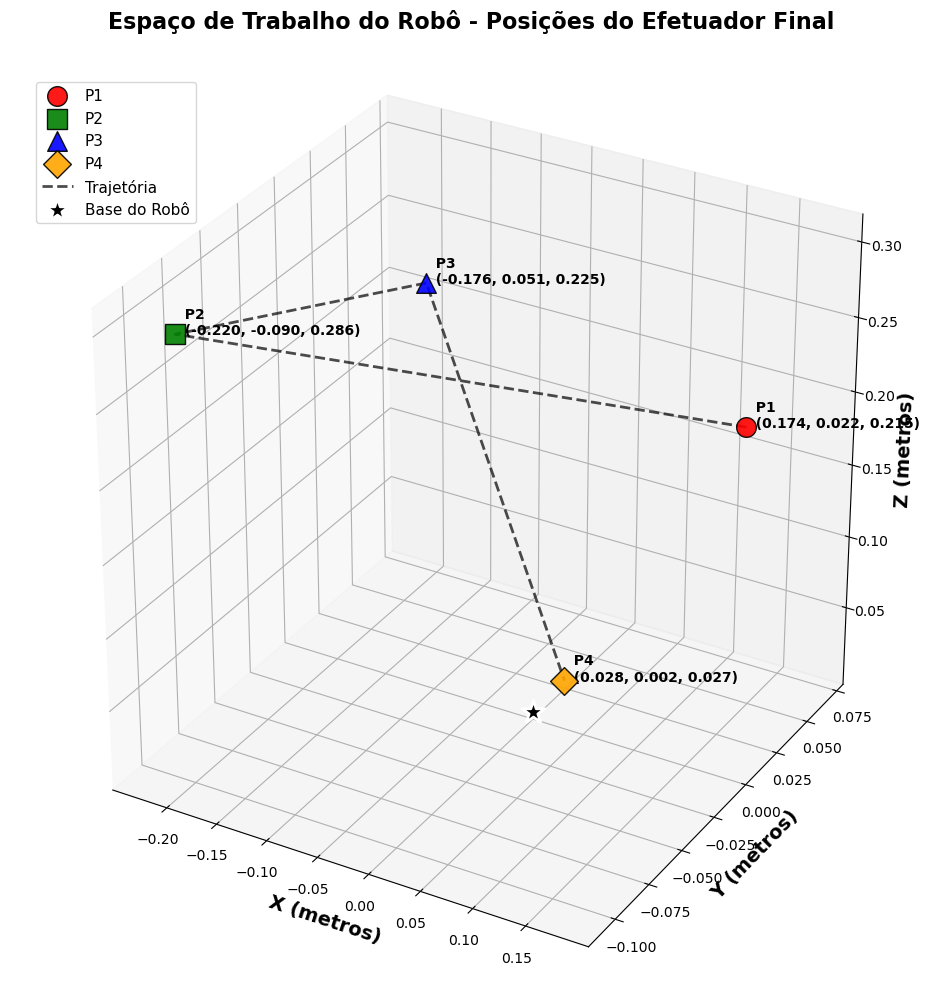


ANÁLISE DO ESPAÇO DE TRABALHO DO ROBÔ
Centro de massa dos pontos: X=-0.0484m, Y=-0.0038m, Z=+0.1883m
Amplitude em X: 0.3946m
Amplitude em Y: 0.1412m
Amplitude em Z: 0.2598m
Distância máxima da origem: 0.3725m
Distância mínima da origem: 0.0389m

RESUMO DAS POSIÇÕES DOS PONTOS (em metros)
----------------------------------------------------------------------
Ponto 1: X=+0.1743, Y=+0.0216, Z=+0.2151
Ponto 2: X=-0.2204, Y=-0.0901, Z=+0.2865
Ponto 3: X=-0.1758, Y=+0.0510, Z=+0.2247
Ponto 4: X=+0.0281, Y=+0.0022, Z=+0.0267


In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_robot_workspace_3d(poses, point_names=None, save_plot=False, filename='robot_workspace_3d.png'):
    """
    Plota o espaço de trabalho do robô em 3D.
    
    Args:
        poses (list): Lista de matrizes de transformação 4x4
        point_names (list): Lista de nomes dos pontos (opcional)
        save_plot (bool): Se True, salva o gráfico
        filename (str): Nome do arquivo para salvar
    """
    if point_names is None:
        point_names = [f'Ponto {i+1}' for i in range(len(poses))]
    
    # Configurações de estilo
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
    
    # Criar figura 3D
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Extrair coordenadas dos pontos
    positions = []
    for i, pose in enumerate(poses):
        x, y, z = pose[0, 3], pose[1, 3], pose[2, 3]
        positions.append([x, y, z])
        
        # Plotar ponto
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        ax.scatter(x, y, z, marker=marker, color=color, s=200, 
                  label=point_names[i], alpha=0.9, edgecolors='black', linewidth=1)
        
        # Adicionar anotação com coordenadas
        ax.text(x, y, z, f'  {point_names[i]}\n  ({x:.3f}, {y:.3f}, {z:.3f})', 
                fontsize=10, weight='bold')
    
    # Converter para array numpy para facilitar o manuseio
    positions = np.array(positions)
    
    # Conectar os pontos com linhas para mostrar a trajetória
    ax.plot3D(positions[:, 0], positions[:, 1], positions[:, 2], 
              'k--', alpha=0.7, linewidth=2, label='Trajetória')
    
    # Adicionar ponto de origem (base do robô)
    ax.scatter(0, 0, 0, marker='*', color='black', s=300, 
              label='Base do Robô', alpha=1.0, edgecolors='white', linewidth=2)
    
    # Configurações dos eixos
    ax.set_xlabel('X (metros)', fontsize=14, weight='bold')
    ax.set_ylabel('Y (metros)', fontsize=14, weight='bold')
    ax.set_zlabel('Z (metros)', fontsize=14, weight='bold')
    ax.set_title('Espaço de Trabalho do Robô - Posições do Efetuador Final', 
                 fontsize=16, weight='bold', pad=20)
    
    # Configurar a legenda
    ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=11)
    
    # Adicionar grid
    ax.grid(True, alpha=0.4)
    
    # Configurar os limites dos eixos para melhor visualização
    all_coords = positions.flatten()
    margin = 0.05  # 5% de margem
    range_coords = np.max(all_coords) - np.min(all_coords)
    ax.set_xlim(np.min(positions[:, 0]) - margin * range_coords, 
                np.max(positions[:, 0]) + margin * range_coords)
    ax.set_ylim(np.min(positions[:, 1]) - margin * range_coords, 
                np.max(positions[:, 1]) + margin * range_coords)
    ax.set_zlim(np.min(positions[:, 2]) - margin * range_coords, 
                np.max(positions[:, 2]) + margin * range_coords)
    
    # Configurar proporção dos eixos
    ax.set_box_aspect([1, 1, 1])
    
    # Melhorar a visualização
    plt.tight_layout()
    
    # Salvar se solicitado
    if save_plot:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Gráfico salvo como: {filename}")
    
    plt.show()
    
    return fig, ax

def calculate_workspace_statistics(poses):
    """
    Calcula estatísticas do espaço de trabalho.
    
    Args:
        poses (list): Lista de matrizes de transformação 4x4
    
    Returns:
        dict: Dicionário com estatísticas
    """
    positions = np.array([[pose[0, 3], pose[1, 3], pose[2, 3]] for pose in poses])
    
    stats = {
        'centro_massa': np.mean(positions, axis=0),
        'amplitude_x': np.max(positions[:, 0]) - np.min(positions[:, 0]),
        'amplitude_y': np.max(positions[:, 1]) - np.min(positions[:, 1]),
        'amplitude_z': np.max(positions[:, 2]) - np.min(positions[:, 2]),
        'distancia_maxima_origem': np.max(np.linalg.norm(positions, axis=1)),
        'distancia_minima_origem': np.min(np.linalg.norm(positions, axis=1))
    }
    
    return stats

# Plotar os pontos em 3D
poses = [pose1, pose2, pose3, pose4]
point_names = ['P1', 'P2', 'P3', 'P4']

fig, ax = plot_robot_workspace_3d(poses, point_names)

# Calcular e exibir estatísticas
stats = calculate_workspace_statistics(poses)

print("\n" + "=" * 70)
print("ANÁLISE DO ESPAÇO DE TRABALHO DO ROBÔ")
print("=" * 70)
print(f"Centro de massa dos pontos: X={stats['centro_massa'][0]:+.4f}m, Y={stats['centro_massa'][1]:+.4f}m, Z={stats['centro_massa'][2]:+.4f}m")
print(f"Amplitude em X: {stats['amplitude_x']:.4f}m")
print(f"Amplitude em Y: {stats['amplitude_y']:.4f}m")
print(f"Amplitude em Z: {stats['amplitude_z']:.4f}m")
print(f"Distância máxima da origem: {stats['distancia_maxima_origem']:.4f}m")
print(f"Distância mínima da origem: {stats['distancia_minima_origem']:.4f}m")
print("=" * 70)

print("\nRESUMO DAS POSIÇÕES DOS PONTOS (em metros)")
print("-" * 70)
for i, pose in enumerate(poses):
    print(f"Ponto {i+1}: X={pose[0,3]:+.4f}, Y={pose[1,3]:+.4f}, Z={pose[2,3]:+.4f}")
print("=" * 70)